# Building The First TSAI Neural Network

- This notebook is a refactoring of the Session 4 Colab file
    - Model-related code are present in `model.py`
    - Utility stuff (plotting, dataloading etc) are present in `utils.py`

In [26]:
# Importing all relevant libraries and functions for execution
# Note: This type of import is not always recommended because of 
# namespace collision, import size and confusion about which module contains
# which function. Current task is not code-heavy so using it for convenience
from model import *
from utils import *
import matplotlib.pyplot as plt

In [17]:
# Defining global variables
batch_size = 512
num_epochs = 20

# Defining a kwarg dict to store param values for train & test dataloader
loader_kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

In [18]:
# Check whether CUDA is available or not
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# Set device to cuda if available or not
device = 'cuda' if cuda else 'cpu'

CUDA Available? True


In [19]:
# Create MNIST train & test datasets and convert them to dataloaders
train_data, test_data = create_train_test_dataset()
train_loader, test_loader = create_train_test_loader(train_data, test_data, **loader_kwargs)

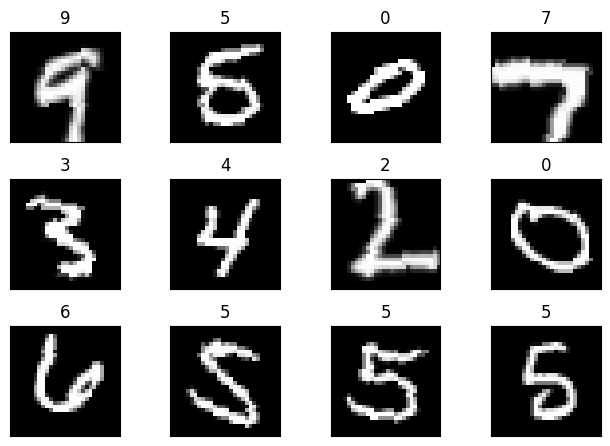

In [20]:
# Investigate a few elements of the train loader
# Get the first set of data and label values
batch_data, batch_label = next(iter(train_loader)) 

# Define a matplotlib figure
fig = plt.figure()

# Displaying the first 12 images of the batch
for i in range(12):
    plt.subplot(3, 4, i+1) # Defining a 2D grid 
    plt.tight_layout() # Reducing space between grid elements
    plt.imshow(batch_data[i].squeeze(0), cmap='gray') # Display image (obtained from squeezing)
    plt.title(batch_label[i].item()) # Display title
    plt.xticks([]) # Remove x axis ticks
    plt.yticks([]) # Remove y axis ticks

In [21]:
# Define our neural network model and display its structure
model = Net().to(device)
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [22]:
# Initialize variables to store loss & accuracy values for both train and test
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [23]:
# Train the model and assess metrics on test set for num_epochs
train_test_run(model, device, train_loader, test_loader, num_epochs, 
               train_acc, train_losses, test_acc, test_losses)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.8240 Batch_id=117 Accuracy=26.93: 100%|██████████| 118/118 [00:33<00:00,  3.56it/s]


Test set: Average loss: 1.5713, Accuracy: 4786/10000 (47.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1563 Batch_id=117 Accuracy=85.64: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.1224, Accuracy: 9637/10000 (96.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0554 Batch_id=117 Accuracy=95.51: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0807, Accuracy: 9760/10000 (97.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1171 Batch_id=117 Accuracy=96.64: 100%|██████████| 118/118 [00:25<00:00,  4.56it/s]


Test set: Average loss: 0.0592, Accuracy: 9804/10000 (98.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0586 Batch_id=117 Accuracy=97.15: 100%|██████████| 118/118 [00:24<00:00,  4.86it/s]


Test set: Average loss: 0.0498, Accuracy: 9836/10000 (98.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0992 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0447, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0236 Batch_id=117 Accuracy=97.72: 100%|██████████| 118/118 [00:24<00:00,  4.80it/s]


Test set: Average loss: 0.0377, Accuracy: 9874/10000 (98.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0570 Batch_id=117 Accuracy=98.10: 100%|██████████| 118/118 [00:24<00:00,  4.73it/s]


Test set: Average loss: 0.0367, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0205 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.0343, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0594 Batch_id=117 Accuracy=98.33: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.0429, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0975 Batch_id=117 Accuracy=98.37: 100%|██████████| 118/118 [00:25<00:00,  4.72it/s]


Test set: Average loss: 0.0305, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0129 Batch_id=117 Accuracy=98.54: 100%|██████████| 118/118 [00:24<00:00,  4.74it/s]


Test set: Average loss: 0.0319, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0058 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:23<00:00,  4.94it/s]


Test set: Average loss: 0.0341, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0682 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]


Test set: Average loss: 0.0311, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0351 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:24<00:00,  4.74it/s]


Test set: Average loss: 0.0266, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0370 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0240, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0312 Batch_id=117 Accuracy=99.08: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.0233, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0111 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0230, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0238 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:24<00:00,  4.75it/s]


Test set: Average loss: 0.0223, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0709 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:24<00:00,  4.77it/s]


Test set: Average loss: 0.0227, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

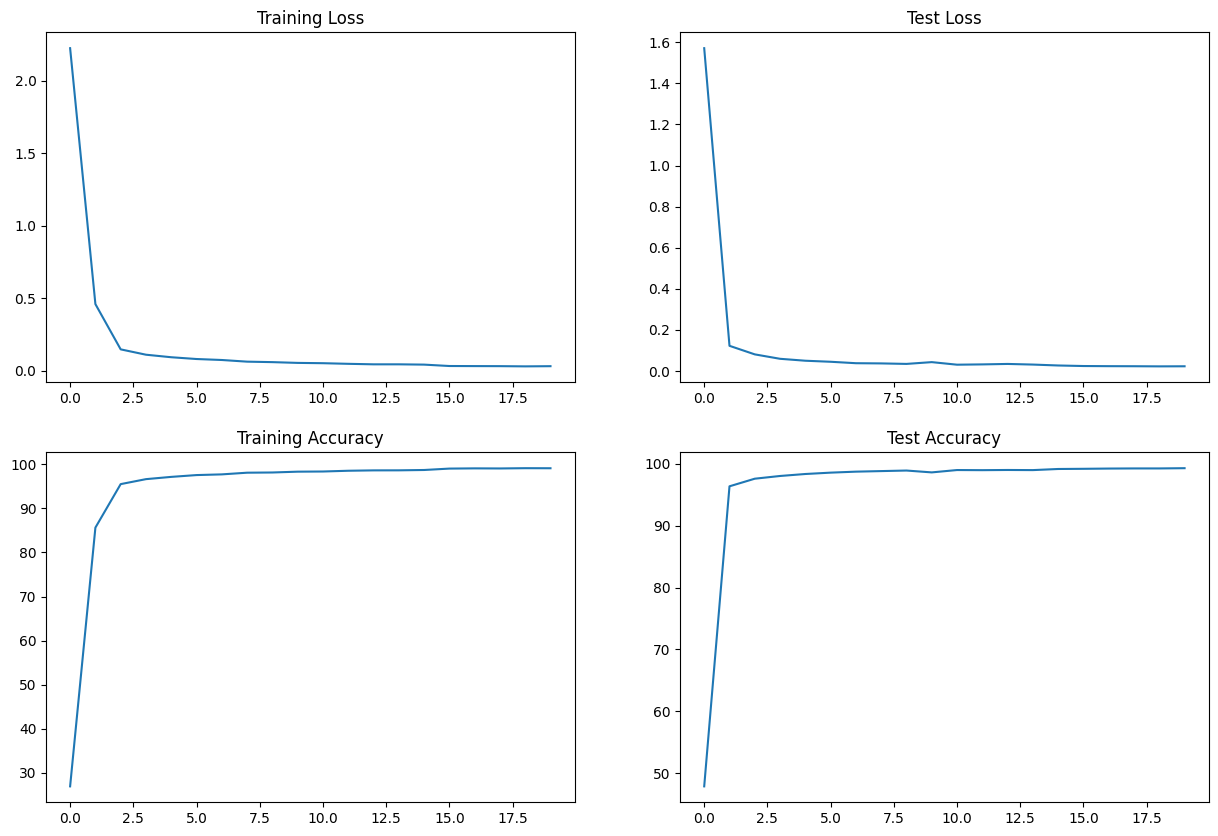

In [29]:
# Plot performance metrics on train & test
plot_loss_acc(train_losses, train_acc, test_losses, test_acc)